Importing dependencies.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import seaborn as sns 
import random 

Loading in the data set Both pokemons and Combat data

In [2]:
pokemon = pd.read_csv("../Pokemon/data/pokemon.csv")
pokemon = pokemon.rename(index=str, columns={"#": "Number"})
combat = pd.read_csv("../Pokemon/data/combats.csv")

Data set is loaded. Let's see what information is in it.

In [3]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Number      800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


12 different collums nice. let's view the first 5 pokemon

In [4]:
pokemon.head()

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Let's do the same with the combat data

In [5]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


No names are used, but I could search for the pokemon involved

In [8]:
print(pokemon['Name'][266],pokemon['Name'][298])

Pupitar Shiftry


Pupitar and Shiftry. Doesn't mean anything to me.

Confirming that data is complete

In [9]:
pokemon.isnull().sum()

Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

1 name is missing from the pokemon list. Not all pokemon have a second type, so I can ignore that.

In [10]:
combat.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

Combat data is complete it seems

Let's find that missing pokemon

In [11]:
print(pokemon[pokemon['Name'].isnull()])

    Number Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
62      63  NaN  Fighting    NaN  65     105       60       60       70   

    Speed  Generation  Legendary  
62     95           1      False  


it's pokemon number 63 that is missing. The national pokedex has Abra on number 63 but that doesn't fit in with the other information. 
Mega pokemon are put in the data set and given their own number so the numbering doesn't fit. 
let's view the 5 pokemon before and after the missing pokemon to see where in the pokedex I have to look.


In [13]:
pokemon[57:68]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
57,58,Meowth,Normal,NaN,40,45,35,40,40,90,1,False
58,59,Persian,Normal,NaN,65,70,60,65,65,115,1,False
59,60,Psyduck,Water,NaN,50,52,48,65,50,55,1,False
60,61,Golduck,Water,NaN,80,82,78,95,80,85,1,False
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False
66,67,Poliwhirl,Water,NaN,65,65,65,50,50,90,1,False


Missing Pokemon is Primeape. Adding it back to the data set

In [14]:
pokemon['Name'][62] = "Primeape"

C:\Users\Jeroen Arts\AppData\Local\Temp\ipykernel_10644\1906487552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon['Name'][62] = "Primeape"


Let's comfirm it's in there

In [15]:
print(pokemon['Name'][62])

Primeape


In [16]:
pokemon.isnull().sum()

Number          0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Data set is complete. Let's look at some combat data. 

In [17]:
total_Wins = combat.Winner.value_counts() # % of win of each pokemon

numberOfWins = combat.groupby('Winner').count() # Number of wins for each pokemon

countByFirst = combat.groupby('Second_pokemon').count()
countBySecond = combat.groupby('First_pokemon').count()
print("Count by first winner: " + str(countByFirst.shape))
print("Count by second winner: " + str(countBySecond.shape))
print("Total Wins: " + str(total_Wins.shape))

Count by first winner: (784, 2)
Count by second winner: (784, 2)
Total Wins: (783,)


From all the pokemon in the combat data set, 1 didn't win any fights. 
Which one is it?

In [18]:
find_losing_pokemon= np.setdiff1d(countByFirst.index.values, numberOfWins.index.values)-1 # -1 because number and index doesn't line up
losing_pokemon = pokemon.iloc[find_losing_pokemon[0],]
print(losing_pokemon)

Number            231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object


Shuckle didn't win anything. Very high defense but hardly any attack. No wonder it didn't win. Attack is a very important stat

Let's merge the combat data set with the original data set

In [19]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='Number')
results3 = pd.merge(pokemon, numberOfWins, left_on='Number', right_index = True, how='left')

results3[results3['Win Percentage'].isnull()]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,NaN,NaN,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN,NaN


Seems like some pokemon didn't fight to begin with.
But which pokemon are the worst among those who did fight?

In [20]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage']).head(10)


,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,3.0,3.0,138.0,0.021739
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False,3.0,3.0,122.0,0.024590
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False,4.0,4.0,129.0,0.031008
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,4.0,4.0,123.0,0.032520
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,False,5.0,5.0,128.0,0.039062
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,5.0,5.0,115.0,0.043478
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False,6.0,6.0,130.0,0.046154
209,210,Wooper,Water,Ground,55,45,45,25,25,15,2,False,6.0,6.0,125.0,0.048000
291,292,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False,7.0,7.0,133.0,0.052632
752,753,Spritzee,Fairy,NaN,78,52,60,63,65,23,6,False,8.0,8.0,133.0,0.060150


Now for the best

In [21]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending = False ).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,127.0,127.0,129.0,0.984496
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,116.0,116.0,119.0,0.974790
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,121.0,121.0,125.0,0.968000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,115.0,115.0,119.0,0.966387
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,136.0,136.0,141.0,0.964539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,124.0,124.0,129.0,0.961240
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,122.0,122.0,127.0,0.960630
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,118.0,118.0,123.0,0.959350
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,119.0,119.0,125.0,0.952000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,114.0,114.0,120.0,0.950000


it seems like pokemon with high attack scores win more then those with low scores.

let's see some pokemon types before, visualizating the combat data.

Text(0.5, 1.0, 'Total Pokemon by Type 1')

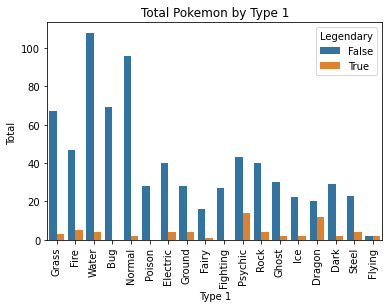

In [24]:
import matplotlib.pyplot as plt
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=results3)

plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")

A lot of water and nomral pokemon with a few legendary pokemon aswell. However it seems there is no legendary pokemon with the flying, poison or bug type as it's first type. Now for the second types.

Text(0.5, 1.0, 'Total Pokemon by Type 2')

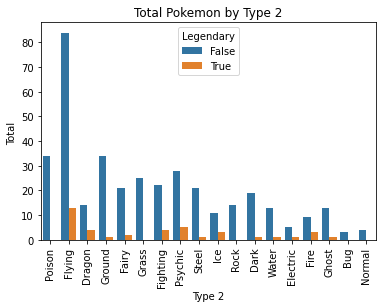

In [25]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=results3)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

Still no legendary bugs or poison type pokemon but quite a few flying. Flying also seems to be the most used second type 

Which type of pokemon wins the most?

In [26]:
results3.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

,Win Percentage
Type 1,
Fairy,0.329300
Rock,0.404852
Steel,0.424529
Poison,0.433262
Bug,0.439006
Ice,0.439604
Grass,0.440364
Water,0.469357
Fighting,0.475616


Flying pokemon do very well in combat. I didn't expect them to beat the dragon type.
let's put everything in a few graphs and see if anything comes out of it.

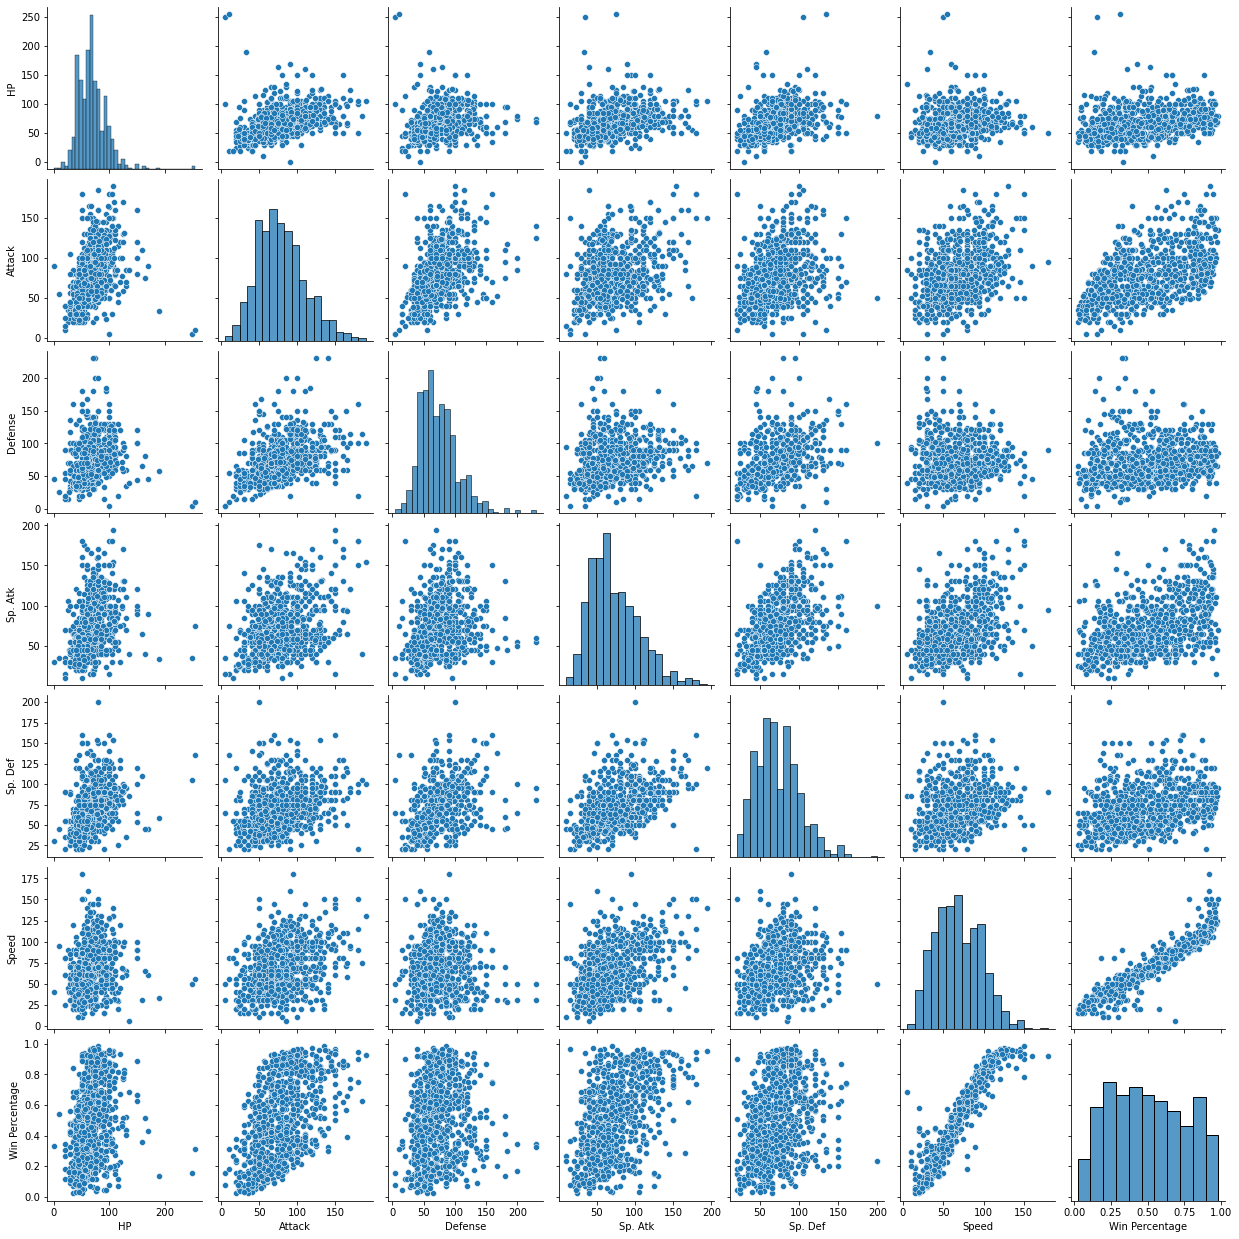

In [27]:
col = ['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
sns.pairplot(results3.loc[:,col].dropna())

it looks great, but it's not very clear. High speed seems to be very important for a high win rate. Perhaps put in a correlation graph instead? First a table to see it in numbers.

In [29]:
results3.loc[:,col].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win Percentage
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.258006
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.500181
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.129426
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.478940
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.324218
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.937742
Win Percentage,0.258006,0.500181,0.129426,0.478940,0.324218,0.937742,1.000000


The numbers and graph don't lie. Speed is a very important factor in order to get a high win rate.

C:\Users\Jeroen Arts\AppData\Local\Temp\ipykernel_10644\1169600344.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=7)
C:\Users\Jeroen Arts\AppData\Local\Temp\ipykernel_10644\1169600344.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=7)


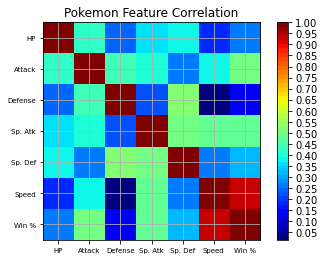

In [30]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Pokemon Feature Correlation')
    labels=['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win %']
    ax1.set_xticklabels(labels,fontsize=7)
    ax1.set_yticklabels(labels,fontsize=7)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.00,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(results3.loc[:,col])

Fancy colors. it does confirm the table and the other graphs that Speed is the most important stat.
Let's take a closer look at speed/win

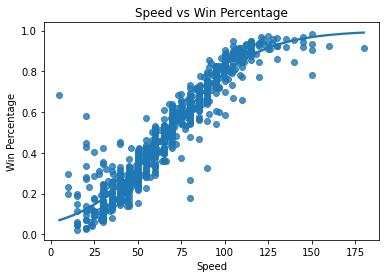

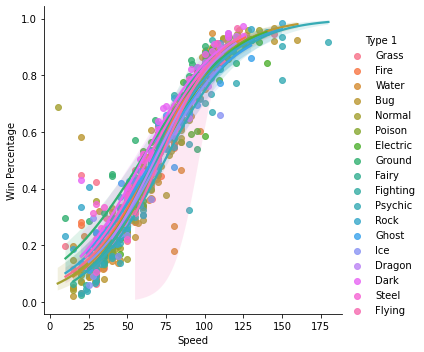

In [31]:
sns.regplot(x="Speed", y="Win Percentage", data=results3, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="Speed", y="Win Percentage", data=results3, hue = 'Type 1',  logistic=True)

Divide by type to see if there is a different patern? Doesn't really look like it, it's all to close together. Attack is the second most important stat. Let's take a look at that

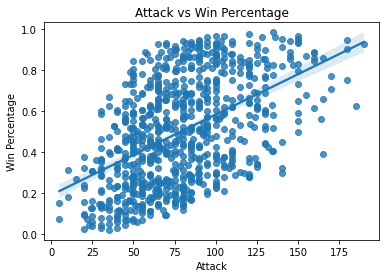

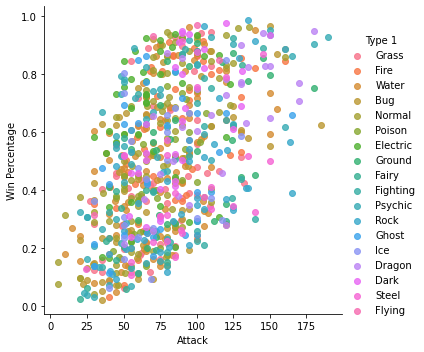

In [32]:
ax = sns.regplot(x="Attack", y="Win Percentage", data=results3).set_title("Attack vs Win Percentage")
sns.lmplot(x="Attack", y="Win Percentage", data=results3, hue = 'Type 1',fit_reg =False)

Can't really say that is one type better then the other, though the earlier winrate table did say that Flying and Dragon types win the most.

Can I get some machine learning to work on this?

In [33]:
dataset = results2 #data set set?

In [34]:
dataset.dropna(axis=0, how='any')
# Splitting the dataset into Training and Test
X = dataset.iloc[:, 5:11].values
y = dataset.iloc[:, 15].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Liniear Regression Go!

In [35]:
def ml_linearreg(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    y_pred = regressor.predict(X_test)
    
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)

    return mae

ml_linearreg(X_train, X_test, y_train, y_test)

0.907614232004021


0.06143408809230802

In [36]:

def ml_svm(X_train, X_test, y_train, y_test):

    from sklearn.svm import SVR
    regressor = SVR(kernel = 'linear')
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))


    y_pred= regressor.predict(X_test)


    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)

    return mae

ml_svm(X_train, X_test, y_train, y_test)


0.9065078337237095


0.06360099438357145

Let's also train a decisiontree

In [37]:
def ml_decisiontree(X_train, X_test, y_train, y_test):

    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))


    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)

    return mae

ml_decisiontree(X_train, X_test, y_train, y_test)

0.9997364519875158


0.05780669034067889

PCA Algorithm

In [38]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print("This is the variance explained by the principle components")
print(explained_variance)




This is the variance explained by the principle components
[0.41314124 0.17695566 0.16108936]


In [39]:
PCA = [ml_linearreg(X_train, X_test, y_train, y_test), 
       ml_svm(X_train, X_test, y_train, y_test), 
       ml_decisiontree(X_train, X_test, y_train, y_test)]

0.7536920624122636
0.7526006202792177
0.9997364519875158


In [40]:
# reduce the features to only speed and attack. 
dataset = results2
dataset.dropna(axis=0, how='any')
# Splitting the dataset into the Training set and Test set
X = dataset.loc[:, ['Attack','Speed']].values
y = dataset.loc[:, ['Win Percentage']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

ml_linearreg(X_train, X_test, y_train, y_test)
ml_svm(X_train, X_test, y_train, y_test)
ml_decisiontree(X_train, X_test, y_train, y_test)

reduced_stats = [ml_linearreg(X_train, X_test, y_train, y_test), 
                 ml_svm(X_train, X_test, y_train, y_test), 
                 ml_decisiontree(X_train, X_test, y_train, y_test)]

0.9049921104553327


c:\Programeren\Python\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9040040161126808
0.9930604401118848
0.9049921104553327


c:\Programeren\Python\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9040040161126808
0.9930604401118848


A few different algorithms are used so let's compare them

In [41]:
ml_results = pd.DataFrame({'Reduced Factors': reduced_stats, 'PCA': PCA})
ml_results.rename(index = {0:'Linear',1:'SVM', 2:'Decision Tree', 3:'Random Forest', 4:'XGBoost'})

,Reduced Factors,PCA
Linear,0.062812,0.099937
SVM,0.064739,0.099990
Decision Tree,0.054356,0.129971


Decision tree seems to be the worst.